In [1]:
import fastreg as fr
from fastreg import I, R, C, D, B, factor

In [2]:
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [3]:
backend = 'cpu' # 'gpu'

In [4]:
# generate random testing data
data = fr.dataset(N=100_000, K1=10, K2=100, models=['linear', 'poisson'])
data

,x1,x2,yhat0,yhat,id1,id2,y0,y,Ep0,Ep,p0,p
0,-1.429225,0.996297,0.269011,1.179011,G,31,0.366874,1.439623,1.308670,3.251157,1,4
1,0.687153,0.103194,0.368062,0.888062,F,2,-1.166090,1.336905,1.444932,2.430415,0,3
2,0.764353,-0.485235,0.038165,0.488165,D,15,0.180055,0.442564,1.038903,1.629324,1,0
3,-0.309887,0.752891,0.458768,0.688768,B,13,-0.972028,0.847762,1.582124,1.991261,1,1
4,-0.616042,1.812251,1.002538,2.222538,D,92,-0.449711,2.159141,2.725189,9.230728,0,10
...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1.560403,2.205245,1.891268,2.931268,E,64,2.478428,3.665472,6.627765,18.751385,4,13
99996,1.974411,1.783084,1.762174,2.402174,A,64,1.630717,2.421973,5.825088,11.047168,5,16
99997,0.192736,1.049506,0.787524,2.197524,G,81,1.282229,2.073151,2.197948,9.002698,2,11
99998,-0.431755,-0.296754,-0.207579,1.162421,F,87,0.740579,0.982307,0.812549,3.197667,1,2


### Formulas

`Factor` — a column or expression

`Term` — a combination of `Factor`s

`Formula` — a combination of unique `Term`s

Built in `Factor`s are: `[R]eal`, `[C]ategorical`, `[I]ntercept`, `[D]emeaned`, and `[B]inned`

In [5]:
# pure [R]eal (a factor)
R('x1')

R(x1)

In [6]:
# convenience method for simple columns
R.x1

R(x1)

In [7]:
# interacted [R]eals (a term)
R.x1*R.x2

R(x1)*R(x2)

In [8]:
# add in [I]ntercept and [C]ategorical (a formula)
I + R.x1*R.x2 + C.id1

I + R(x1)*R(x2) + C(id1)|FIRST

In [9]:
# pure [B]inned column
B('x1', 10)

C(x1:bin10|FIRST)

In [10]:
# add in [B]inned and [D]emeaned (a formula)
I + B.x1(10)*R.x1 + D.x2('id1')

I + C(x1:bin10)*R(x1) + R(x2-μ|id1)

In [11]:
# use general python expressions in factors
I + R('abs(x1)') + C('x2 > 0')

I + R(abs(x1)) + C(x2 > 0)|FIRST

### Interfaces

In [12]:
# pythonic formula
fr.ols(y=R.y, x=I+R.x1+R.x2+C.id1+C.id2, data=data)

y,coeff,stderr,low95,high95,pvalue
I,0.073226,0.032487,0.009552,0.136899,0.024196
x1,0.297097,0.003171,0.290881,0.303312,0.000000
x2,0.604929,0.003172,0.598712,0.611145,0.000000
id1=B,0.131783,0.014253,0.103848,0.159719,0.000000
id1=C,0.230635,0.014157,0.202887,0.258383,0.000000
...,...,...,...,...,...
id2=95,0.943004,0.044338,0.856104,1.029905,0.000000
id2=96,0.976060,0.044757,0.888337,1.063783,0.000000
id2=97,0.951987,0.044315,0.865131,1.038842,0.000000
id2=98,0.908992,0.043913,0.822924,0.995060,0.000000


In [13]:
# R style formula
form = 'y ~ 1 + x1 + x2 + C(id1) + C(id2)'
fr.ols(formula=form, data=data)

y,coeff,stderr,low95,high95,pvalue
I,0.073226,0.032487,0.009552,0.136899,0.024196
x1,0.297097,0.003171,0.290881,0.303312,0.000000
x2,0.604929,0.003172,0.598712,0.611145,0.000000
id1=B,0.131783,0.014253,0.103848,0.159719,0.000000
id1=C,0.230635,0.014157,0.202887,0.258383,0.000000
...,...,...,...,...,...
id2=95,0.943004,0.044338,0.856104,1.029905,0.000000
id2=96,0.976060,0.044757,0.888337,1.063783,0.000000
id2=97,0.951987,0.044315,0.865131,1.038842,0.000000
id2=98,0.908992,0.043913,0.822924,0.995060,0.000000


In [14]:
# tuple/list style formula
fr.ols(y='y', x=['1', 'x1', 'x2', C('id1'), C('id2')], data=data)

y,coeff,stderr,low95,high95,pvalue
1,0.073226,0.032487,0.009552,0.136899,0.024196
x1,0.297097,0.003171,0.290881,0.303312,0.000000
x2,0.604929,0.003172,0.598712,0.611145,0.000000
id1=B,0.131783,0.014253,0.103848,0.159719,0.000000
id1=C,0.230635,0.014157,0.202887,0.258383,0.000000
...,...,...,...,...,...
id2=95,0.943004,0.044338,0.856104,1.029905,0.000000
id2=96,0.976060,0.044757,0.888337,1.063783,0.000000
id2=97,0.951987,0.044315,0.865131,1.038842,0.000000
id2=98,0.908992,0.043913,0.822924,0.995060,0.000000


### Extras

In [15]:
# demeaned in action (x1 unconditional, x2 conditional on id1)
fr.ols(y=R.y, x=I+D.x1+D.x2('id1'), data=data)

y,coeff,stderr,low95,high95,pvalue
I,1.045507,0.003426,1.038791,1.052223,0.0
x1-μ,0.296732,0.003431,0.290007,0.303457,0.0
x2-μ|id1,0.605145,0.003432,0.598418,0.611872,0.0


In [16]:
# quantile binning (x2 on deciles, self interacted)
fr.ols(y=R.y, x=I+R.x1+B.x2(10)*R.x2, data=data)

y,coeff,stderr,low95,high95,pvalue
I,1.050414,0.008411,1.033929,1.066899,0.0
x1,0.296694,0.003430,0.289972,0.303417,0.0
(x2:bin10=0)*x2,0.666943,0.040644,0.587283,0.746603,0.0
(x2:bin10=1)*x2,0.600625,0.015680,0.569892,0.631357,0.0
(x2:bin10=2)*x2,0.599660,0.009415,0.581206,0.618113,0.0
(x2:bin10=3)*x2,0.616892,0.010166,0.596967,0.636817,0.0
(x2:bin10=4)*x2,0.615962,0.021202,0.574407,0.657516,0.0
(x2:bin10=5)*x2,0.614427,0.022103,0.571105,0.657749,0.0
(x2:bin10=6)*x2,0.596445,0.010333,0.576194,0.616697,0.0
(x2:bin10=7)*x2,0.606194,0.009389,0.587792,0.624597,0.0


In [17]:
# hdfe — fast for one categorical term
fr.ols(y=R.y, x=I+R.x1+R.x2, hdfe=C.id1*C.id2, data=data)

y,coeff,stderr,low95,high95,pvalue
I,0.028447,0.096774,-0.161227,0.218122,0.768793
x1,0.296764,0.003185,0.290521,0.303008,0.000000
x2,0.605099,0.003187,0.598854,0.611345,0.000000
"id1=A,id2=1",0.175028,0.139597,-0.098578,0.448634,0.209912
"id1=A,id2=2",0.043070,0.141511,-0.234286,0.320426,0.760856
...,...,...,...,...,...
"id1=J,id2=95",1.910192,0.141916,1.632043,2.188342,0.000000
"id1=J,id2=96",1.927507,0.136862,1.659261,2.195752,0.000000
"id1=J,id2=97",1.844808,0.145444,1.559742,2.129874,0.000000
"id1=J,id2=98",1.869408,0.133902,1.606965,2.131851,0.000000


In [18]:
# absorbtion — fast but no std errors
fr.ols(y=R.y, x=I+R.x1+R.x2, absorb=C.id1+C.id2, data=data)

y,coeff,stderr,low95,high95,pvalue
I,1.046833,0.002910,1.041130,1.052536,0.0
x1,0.297097,0.003209,0.290808,0.303385,0.0
x2,0.604929,0.003069,0.598913,0.610944,0.0


In [19]:
# clustered standard errors (any term allowed)
fr.ols(y=R.y, x=I+R.x1+R.x2+C.id1+C.id2, cluster=C.id1*C.id2, data=data)

y,coeff,stderr,low95,high95,pvalue
I,0.073226,0.015703,0.042448,0.104003,0.000003
x1,0.297097,0.003209,0.290808,0.303386,0.000000
x2,0.604929,0.003069,0.598913,0.610944,0.000000
id1=B,0.131783,0.013160,0.105990,0.157577,0.000000
id1=C,0.230635,0.012046,0.207024,0.254246,0.000000
...,...,...,...,...,...
id2=95,0.943004,0.027624,0.888863,0.997146,0.000000
id2=96,0.976060,0.027493,0.922174,1.029945,0.000000
id2=97,0.951987,0.030078,0.893035,1.010939,0.000000
id2=98,0.908992,0.025788,0.858449,0.959535,0.000000


### GLM

In [20]:
fr.poisson(y=R.p, x=I+R.x1+R.x2+C.id1+C.id2, data=data, backend=backend)

[  0] ℓ=1.19471, g=1.40040, Δβ=0.56947, Δℓ=inf, μR=0.50608, μC=0.47347
[385] ℓ=2.52422, g=0.00003, Δβ=0.00010, Δℓ=0.00000, μR=0.33668, μC=0.50211


p,coeff,stderr,low95,high95,pvalue
I,0.102138,0.021504,0.059992,0.144285,0.000002
x1,0.304344,0.001635,0.301141,0.307548,0.000000
x2,0.603565,0.001622,0.600387,0.606743,0.000000
id1=B,0.114555,0.009205,0.096515,0.132596,0.000000
id1=C,0.197712,0.008888,0.180292,0.215132,0.000000
...,...,...,...,...,...
id2=95,0.923698,0.024080,0.876502,0.970894,0.000000
id2=96,0.980600,0.024329,0.932915,1.028284,0.000000
id2=97,0.954376,0.024422,0.906510,1.002242,0.000000
id2=98,0.987184,0.024183,0.939787,1.034580,0.000000


In [21]:
fr.poisson(y=R.p, x=I+R.x1+R.x2+C.id1, hdfe=C.id2, data=data, backend=backend)

[  0] ℓ=1.19471, g=1.40040, Δβ=0.56947, Δℓ=inf, μR=0.50608, μC=0.47347
[385] ℓ=2.52422, g=0.00003, Δβ=0.00010, Δℓ=0.00000, μR=0.33668, μC=0.50211


p,coeff,stderr,low95,high95,pvalue
I,0.102138,0.021503,0.059993,0.144284,0.000002
x1,0.304344,0.001635,0.301141,0.307548,0.000000
x2,0.603565,0.001622,0.600387,0.606743,0.000000
id1=B,0.114555,0.009205,0.096515,0.132596,0.000000
id1=C,0.197712,0.008888,0.180292,0.215132,0.000000
...,...,...,...,...,...
id2=95,0.923698,0.024080,0.876503,0.970894,0.000000
id2=96,0.980600,0.024329,0.932916,1.028283,0.000000
id2=97,0.954376,0.024422,0.906511,1.002241,0.000000
id2=98,0.987184,0.024182,0.939787,1.034580,0.000000


### Accuracy

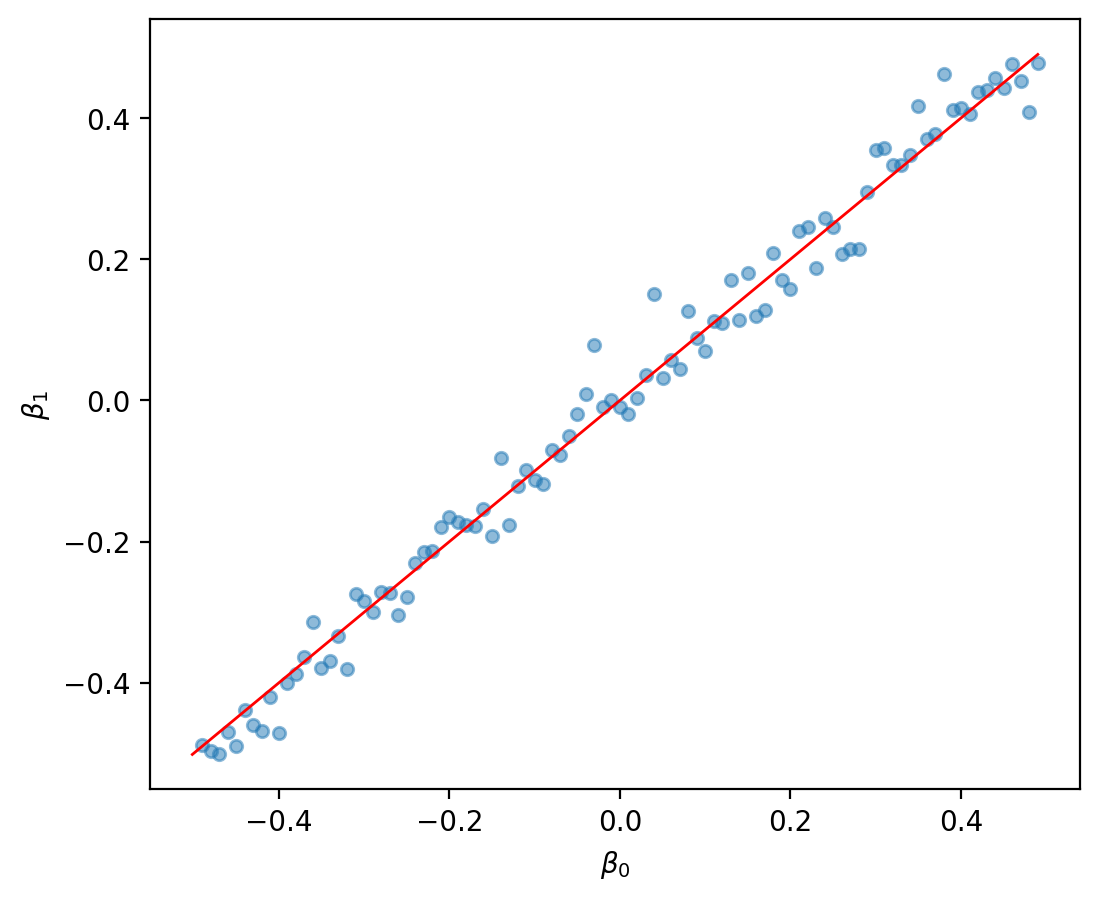

In [22]:
# how do we do on ids?
fr.testing.test_ols(data, plot=True);

[  0] ℓ=1.19471, g=1.40040, Δβ=0.56947, Δℓ=inf, μR=0.50608, μC=0.47347
[385] ℓ=2.52422, g=0.00003, Δβ=0.00010, Δℓ=0.00000, μR=0.33668, μC=0.50211


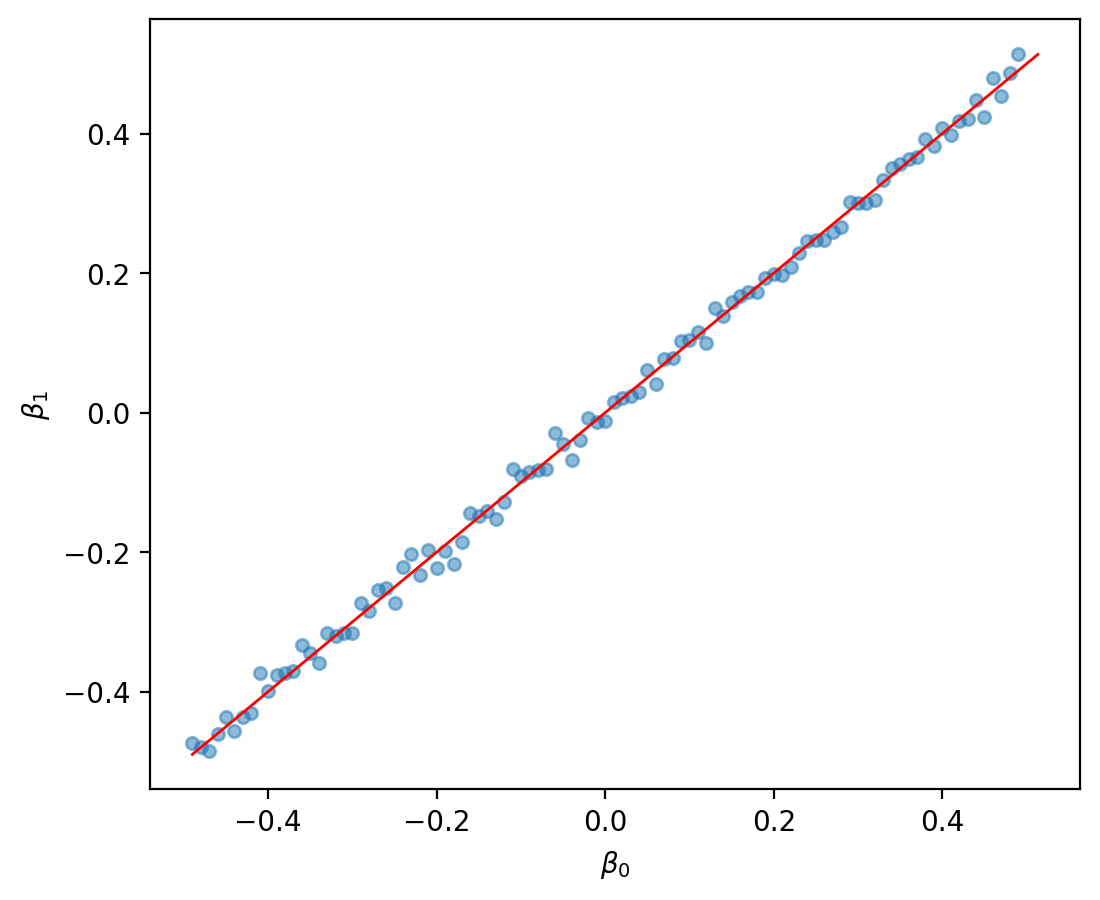

In [23]:
# slow on first run, try it twice
fr.testing.test_glm(data, plot=True, backend=backend);

### Custom Factors

In [24]:
# simple factor
@factor
def demean(x):
    return x - np.mean(x)
fact = demean.x1
print(fact)
fact.eval(data)

R(demean(x1))


Column(name='demean(x1)', labels='demean(x1)', values=array([-1.42976817,  0.68660894,  0.76380937, ...,  0.19219221,
       -0.43229829, -1.34745765]), valid=array([ True,  True,  True, ...,  True,  True,  True]))

In [25]:
# complex factor
@factor(eval_args=(0, 1))
def cdemean(x, i):
    datf = pd.DataFrame({'vals': x, 'cond': i})
    cmean = datf.groupby('cond')['vals'].mean().rename('mean')
    datf = datf.join(cmean, on='cond')
    return datf['vals'] - datf['mean']
cfact = cdemean('x1', 'id1')
print(cfact)
cfact.eval(data)

R(cdemean(x1,id1))


Column(name='cdemean(x1,id1)', labels='cdemean(x1,id1)', values=array([-1.43336595,  0.6757273 ,  0.74892574, ...,  0.18859444,
       -0.44317993, -1.33460797]), valid=array([ True,  True,  True, ...,  True,  True,  True]))

In [26]:
# named factor
@factor(name=lambda x: f'{x}-μ')
def ndemean(x):
    return x - np.mean(x)
nfact = ndemean.x1
print(nfact)
nfact.eval(data)

R(x1-μ)


Column(name='x1-μ', labels='x1-μ', values=array([-1.42976817,  0.68660894,  0.76380937, ...,  0.19219221,
       -0.43229829, -1.34745765]), valid=array([ True,  True,  True, ...,  True,  True,  True]))

In [27]:
# inject into eval namespace (note @ required to reference)
logit = lambda x: 1/(1+np.exp(-x))
lfact = R('@logit(x1)')
print(lfact)
lfact.eval(data, extern={'logit': logit})

R(@logit(x1))


Column(name='@logit(x1)', labels='@logit(x1)', values=array([0.19321953, 0.6653332 , 0.68229806, ..., 0.54803535, 0.39370741,
       0.20637534]), valid=array([ True,  True,  True, ...,  True,  True,  True]))

In [28]:
# create custom factor (somewhat more elegant)
flogit = factor(logit, name='logit')
lfact = flogit('x1')
print(lfact)
lfact.eval(data)

R(logit(x1))


Column(name='logit(x1)', labels='logit(x1)', values=array([0.19321953, 0.6653332 , 0.68229806, ..., 0.54803535, 0.39370741,
       0.20637534]), valid=array([ True,  True,  True, ...,  True,  True,  True]))